<a href="https://colab.research.google.com/github/ms-anlaytics/Resenet34_petsmart/blob/main/petsmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 719 kB 5.2 MB/s 
     |████████████████████████████████| 432 kB 51.9 MB/s 
     |████████████████████████████████| 1.3 MB 49.7 MB/s 
     |████████████████████████████████| 4.9 MB 40.4 MB/s 
     |████████████████████████████████| 115 kB 58.6 MB/s 
     |████████████████████████████████| 212 kB 47.7 MB/s 
     |████████████████████████████████| 163 kB 49.1 MB/s 
     |████████████████████████████████| 127 kB 48.2 MB/s 
     |████████████████████████████████| 6.6 MB 40.4 MB/s 
Mounted at /content/gdrive


In [ ]:
import fastbook
fastbook.setup_book()

In [ ]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)

In [ ]:
Path.BASE_PATH = path

In [ ]:
# see  what the dataset consists of, individual files or csv formatted data
path.ls()

(#2) [Path('annotations'),Path('images')]

In [ ]:
#inside the images directory
(path/"images").ls()

(#7393) [Path('images/american_bulldog_8.jpg'),Path('images/shiba_inu_111.jpg'),Path('images/Bengal_76.jpg'),Path('images/Persian_7.jpg'),Path('images/havanese_73.jpg'),Path('images/Bengal_197.jpg'),Path('images/Russian_Blue_98.jpg'),Path('images/yorkshire_terrier_71.jpg'),Path('images/leonberger_13.jpg'),Path('images/keeshond_113.jpg')...]

In [ ]:
#filename contains the pet breed, a number, and file extension


fname = (path/"images").ls()[0] #[0:25]

fname

Path('images/american_bulldog_8.jpg')

In [ ]:
# regular expression
re.findall(r'(.+)_\d+.jpg$', fname.name)

['american_bulldog']

In [ ]:
#uses regular expression to label the dataset
# resizes image to fit model
pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))
dls = pets.dataloaders(path/"images")

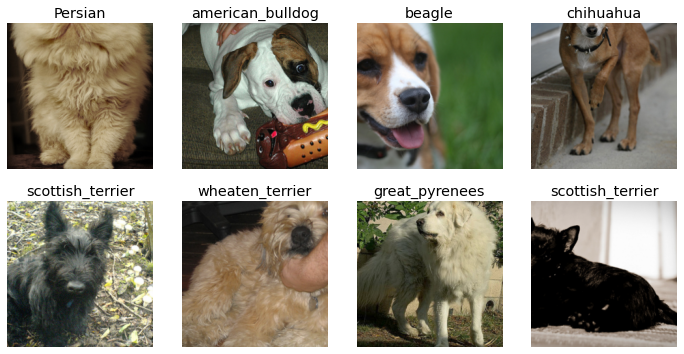

In [ ]:


dls.show_batch(nrows=2, ncols=4)



In [ ]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,time
0,1.513487,0.306909,0.094723,36:25


epoch,train_loss,valid_loss,error_rate,time
0,0.522805,0.268140,0.079838,52:13
1,0.344054,0.215681,0.064276,52:31


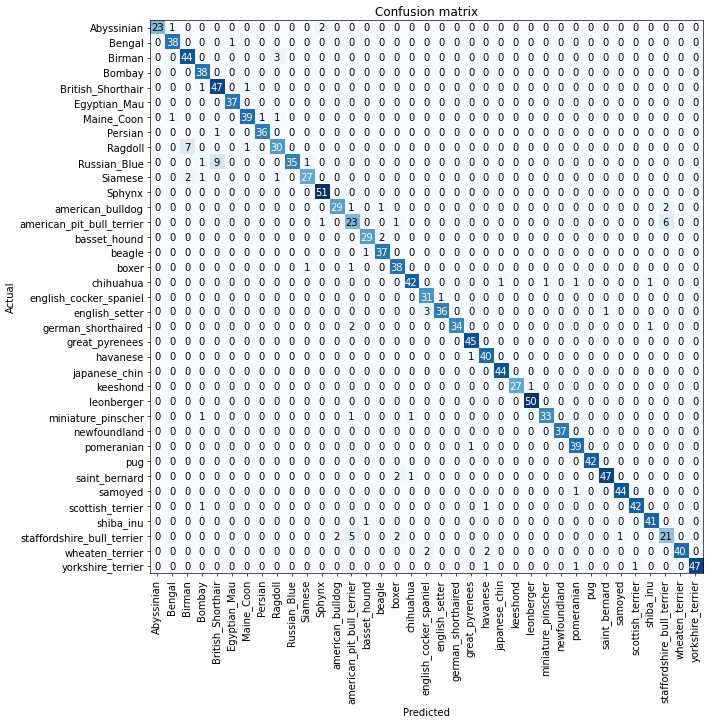

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
learn.save ('./pet_model', with_opt=True, pickle_protocol=2)

Path('models/pet_model.pth')

In [ ]:
!ls

gdrive	models	sample_data


In [ ]:
!tar -czvf model.tar.gz models/

models/
models/pet_model.pth


In [ ]:
from google.colab import files
files.download('model.tar.gz')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>